In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
train = pd.read_csv('../Data/PJT002_train.csv')

train.sample()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
11748,134621,2018-10-28 01:16:02,NaN,NaN,4,92.56,92.56,0.0,NaN,1.0,...,N,303,0,0,5154,18923,13781,145,0,N


In [4]:
pd.DataFrame(train.columns)

,0
0,id
1,dt_of_fr
2,bldng_us
3,bldng_archtctr
4,bldng_cnt
5,bldng_ar
6,ttl_ar
7,lnd_ar
8,dt_of_athrztn
9,ttl_grnd_flr


In [5]:
train.shape

(59199, 172)

In [6]:
train.isnull().sum()

id                          0
dt_of_fr                    0
bldng_us                27677
bldng_archtctr          27665
bldng_cnt                   0
bldng_ar                    0
ttl_ar                      0
lnd_ar                      0
dt_of_athrztn           27581
ttl_grnd_flr            10210
ttl_dwn_flr             11005
bldng_us_clssfctn       29343
tmprtr                     13
prcpttn                 53629
wnd_spd                    33
wnd_drctn                 221
hmdt                       22
gas_engry_us_201401     53825
ele_engry_us_201401     43550
gas_engry_us_201402     53825
ele_engry_us_201402     43550
gas_engry_us_201403     53825
ele_engry_us_201403     43550
gas_engry_us_201404     53825
ele_engry_us_201404     43550
gas_engry_us_201405     53825
ele_engry_us_201405     43550
gas_engry_us_201406     53825
ele_engry_us_201406     43550
gas_engry_us_201407     53825
                        ...  
lw_13101410             58916
lw_13111010             58899
lw_1311111

In [7]:
# 전기 가스 제외 나머지 칼럼
columns = ['id', 'dt_of_fr', 'bldng_us', 'bldng_archtctr', 'bldng_cnt'
           , 'bldng_ar', 'ttl_ar', 'lnd_ar', 'dt_of_athrztn', 'ttl_grnd_flr'
           , 'ttl_dwn_flr', 'bldng_us_clssfctn', 'tmprtr', 'prcpttn'
           , 'wnd_spd', 'wnd_drctn', 'hmdt', 'jmk'
           , 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn'
          ]

train[columns].isnull().sum()

id                          0
dt_of_fr                    0
bldng_us                27677
bldng_archtctr          27665
bldng_cnt                   0
bldng_ar                    0
ttl_ar                      0
lnd_ar                      0
dt_of_athrztn           27581
ttl_grnd_flr            10210
ttl_dwn_flr             11005
bldng_us_clssfctn       29343
tmprtr                     13
prcpttn                 53629
wnd_spd                    33
wnd_drctn                 221
hmdt                       22
jmk                         0
fr_sttn_dstnc               0
fr_wthr_fclt_dstnc          0
mlt_us_yn                   0
cctv_dstnc                  0
cctv_in_100m                0
fr_wthr_fclt_in_100m        0
tbc_rtl_str_dstnc           0
sft_emrgnc_bll_dstnc        0
ahsm_dstnc                  0
no_tbc_zn_dstnc             0
bldng_cnt_in_50m            0
fr_yn                       0
dtype: int64

In [8]:
# NULL 값 없는 칼럼 전체

# 'emd_nm', 4개
# tmprtr 온도                     13
# wnd_spd 풍속                    33
# hmdt 습도                       22
# emd_nm 주소                     4
# hm_cnt 행정구역 인구            701
# fr_mn_cnt 관할 소방서 인원      41
# ttl_grnd_flr 건물 지상 층수 합 10210
# ttl_dwn_flr 건물 지하 층수 합  11005

columns = ['id', 'dt_of_fr', 'bldng_cnt', 'bldng_ar', 'ttl_ar', 'lnd_ar'
           , 'jmk', 'fr_sttn_dstnc', 'fr_wthr_fclt_dstnc'
           , 'mlt_us_yn', 'cctv_dstnc', 'cctv_in_100m'
           , 'fr_wthr_fclt_in_100m', 'tbc_rtl_str_dstnc', 'sft_emrgnc_bll_dstnc'
           , 'ahsm_dstnc', 'no_tbc_zn_dstnc', 'bldng_cnt_in_50m', 'fr_yn'
          ]

df = train[columns]

In [9]:
df.sample()

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
56039,97046,2018-03-21 04:54:18,1,83.16,83.16,228.0,대,4948,1258,N,1153,0,0,1627,83640,2213,1508,0,N


## fr_yn One HOt Encoding
Y 1
N 0

In [10]:
df['fr_yn'].unique()

array(['N', 'Y'], dtype=object)

In [11]:
df['fire_yes'] = df['fr_yn'] == 'Y'

df[['fr_yn', 'fire_yes']].sample()

,fr_yn,fire_yes
17529,N,False


In [12]:
df[~df['fire_yes']]

,id,dt_of_fr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,jmk,fr_sttn_dstnc,fr_wthr_fclt_dstnc,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn,fire_yes
0,133759,2015-10-03 02:33:46,3,112.8600,112.8600,200.00,대,1727,609,N,129,0,0,809,2453,17664,83,0,N,False
1,96248,2016-11-13 17:05:57,3,721.8200,1109.5400,0.00,대,2659,79,N,27,5,1,1731,2561,18136,50,0,N,False
2,71317,2016-11-21 12:46:36,4,47.0600,47.0600,288.00,대,4093,259,N,273,0,0,825,3964,14944,270,1,N,False
3,86638,2016-11-07 02:50:14,2,171.4500,176.6400,1379.00,주,5931,103,N,109,0,0,1264,2572,15104,132,0,N,False
4,97748,2014-01-28 16:36:43,4,0.0000,0.0000,0.00,대,10433,8302,N,739,0,0,10241,100127,5000,5004,0,N,False
9,85144,2014-01-18 11:00:03,1,158.5700,254.5300,340.00,대,4894,174,N,222,0,0,58,3830,14479,103,6,N,False
11,131084,2016-05-19 10:49:16,1,128.5000,197.7100,259.00,대,2942,302,N,180,0,0,1955,2767,14997,287,0,N,False
12,105894,2015-02-09 03:36:02,3,70.6500,70.6500,274.00,대,3522,317,N,373,0,0,1692,3554,15757,274,0,N,False
13,122039,2015-02-21 05:00:38,2,59.1000,59.1000,327.00,대,5474,88,N,710,0,0,46,3678,17333,183,1,N,False
14,93985,2018-02-06 10:34:36,2,204.0000,204.0000,618.00,대,2438,443,N,257,0,0,999,1355,19979,368,0,N,False


# datetime Parsing 
dt_of_fr 화재 신고 일시?

In [13]:
df['year'] = pd.to_datetime(df['dt_of_fr']).dt.year
df['month'] = pd.to_datetime(df['dt_of_fr']).dt.month
df['day'] = pd.to_datetime(df['dt_of_fr']).dt.day
df['hour'] = pd.to_datetime(df['dt_of_fr']).dt.hour
df['minute'] = pd.to_datetime(df['dt_of_fr']).dt.minute
df['second'] = pd.to_datetime(df['dt_of_fr']).dt.second
df['dayofweek'] = pd.to_datetime(df['dt_of_fr']).dt.day_name()

df['year-month'] = df['dt_of_fr'].apply(lambda x: x[:7])

df[['dt_of_fr', 'year-month', 'year', 'month', 'day', 'dayofweek', 'hour', 'minute', 'second']].sample()

,dt_of_fr,year-month,year,month,day,dayofweek,hour,minute,second
55469,2018-02-03 04:31:29,2018-02,2018,2,3,Saturday,4,31,29


## df['fire_yes'] == True 불이 난 날

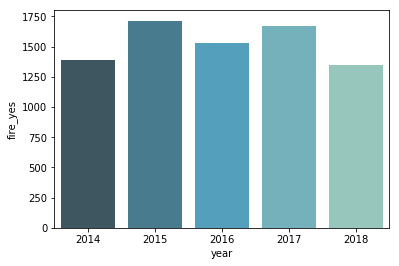

In [14]:
data = pd.DataFrame(df.groupby('year')['fire_yes'].sum()).reset_index()

sns.barplot(x='year', y='fire_yes', data=data, palette='GnBu_d')

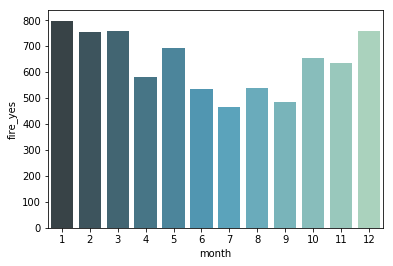

In [15]:
data = pd.DataFrame(df.groupby('month')['fire_yes'].sum()).reset_index()

sns.barplot(x='month', y='fire_yes', data=data, palette='GnBu_d')

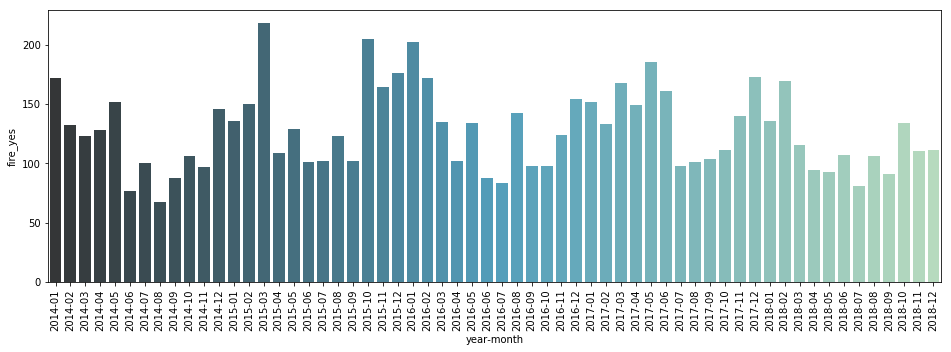

In [16]:
data = pd.DataFrame(df.groupby('year-month')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
sns.barplot(x='year-month', y='fire_yes', data=data, palette='GnBu_d')
plt.xticks(rotation=90)
plt.show()

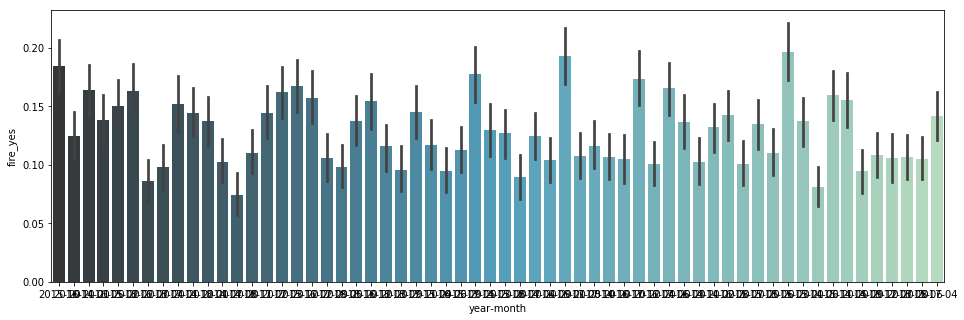

In [17]:
plt.figure(figsize=[16, 5])
sns.barplot(x='year-month', y='fire_yes', data=df, palette='GnBu_d')

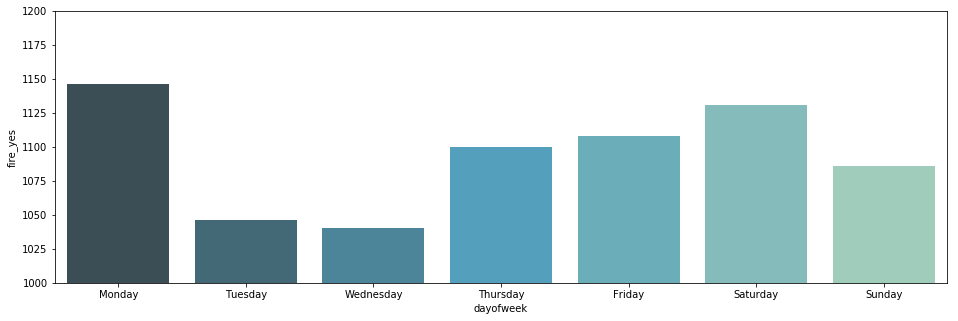

In [18]:
data = pd.DataFrame(df.groupby('dayofweek')['fire_yes'].sum()).reset_index()

index_weekday = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=[16, 5])
axes=sns.barplot(x='dayofweek', y='fire_yes', data=data, order=index_weekday, palette='GnBu_d')
axes.set(ylim=(1000, 1200))
plt.show()

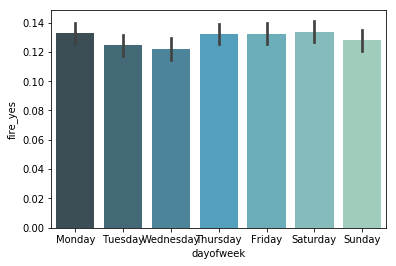

In [19]:
sns.barplot(x='dayofweek', y='fire_yes', data=df, order=index_weekday, palette='GnBu_d')

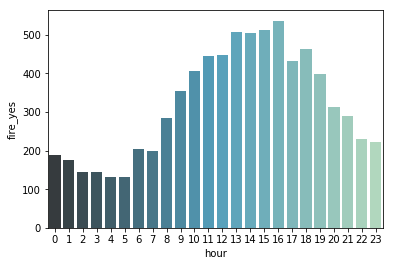

In [20]:
data = pd.DataFrame(df.groupby('hour')['fire_yes'].sum()).reset_index()

sns.barplot(x='hour', y='fire_yes', data=data, palette='GnBu_d')
plt.show()

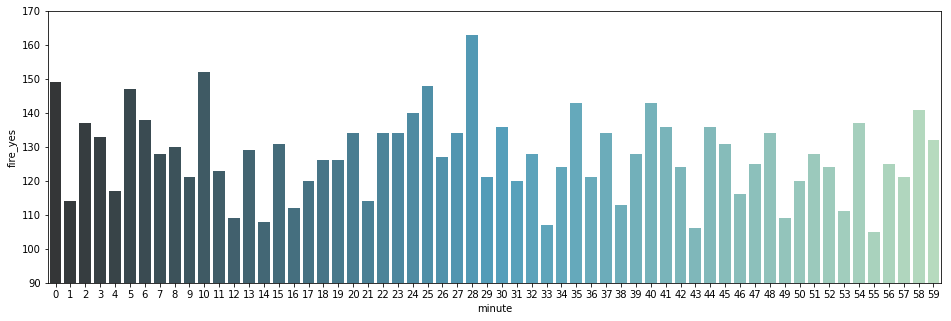

In [21]:
data = pd.DataFrame(df.groupby('minute')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 5])
axes = sns.barplot(x='minute', y='fire_yes', data=data, palette='GnBu_d')
axes.set(ylim=(90, 170))
plt.show()

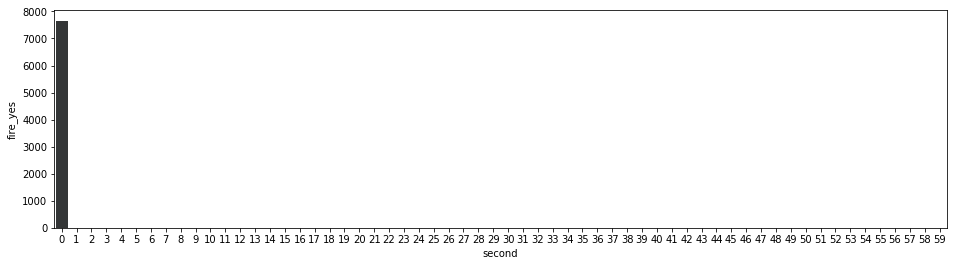

In [22]:
data = pd.DataFrame(df.groupby('second')['fire_yes'].sum()).reset_index()

plt.figure(figsize=[16, 4])
sns.barplot(x='second', y='fire_yes', data=data, palette='GnBu_d')
plt.show()

## df['fire_yes'] == False 불이 안난 날

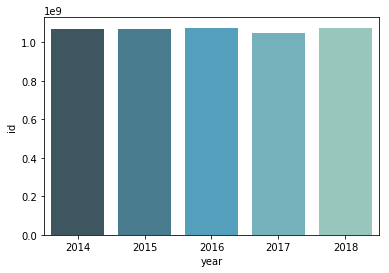

In [23]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('year')['id'].sum()).reset_index()

sns.barplot(x='year', y='id', data=data, palette='GnBu_d')

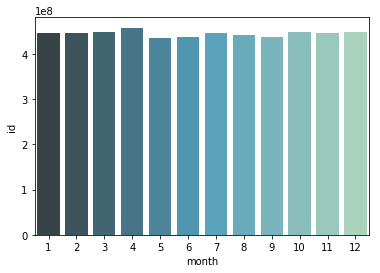

In [24]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('month')['id'].sum()).reset_index()

sns.barplot(x='month', y='id', data=data, palette='GnBu_d')

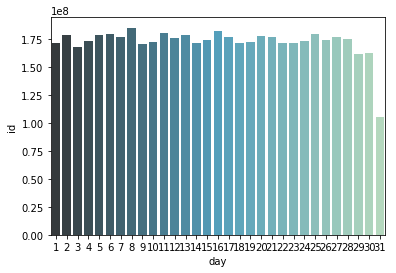

In [25]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('day')['id'].sum()).reset_index()

sns.barplot(x='day', y='id', data=data, palette='GnBu_d')

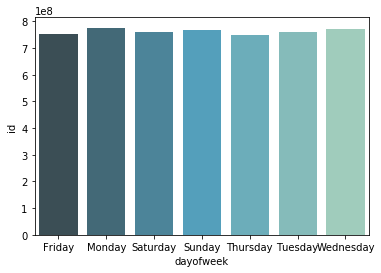

In [26]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('dayofweek')['id'].sum()).reset_index()

sns.barplot(x='dayofweek', y='id', data=data, palette='GnBu_d')

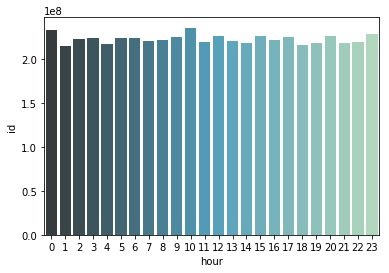

In [27]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('hour')['id'].sum()).reset_index()

sns.barplot(x='hour', y='id', data=data, palette='GnBu_d')

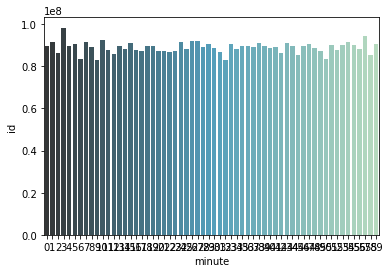

In [28]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('minute')['id'].sum()).reset_index()

sns.barplot(x='minute', y='id', data=data, palette='GnBu_d')

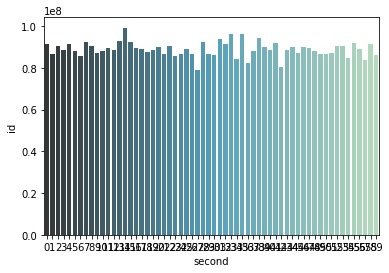

In [29]:
data = pd.DataFrame(df[df['fire_yes'] == False].groupby('second')['id'].sum()).reset_index()

sns.barplot(x='second', y='id', data=data, palette='GnBu_d')

# correlation

In [30]:
df.corr()
# second -0.5 :화재발생은 0초에만 있어서
# fr_wthr_fclt_dstnc -0.16: 소방용수시설과 가까울수록 화재발생
# - 불이 자주 나는 곳에 소방용수시설을 설치했기 때문 
# ahsm_dstnc 0.11: 자동심장제세동기와의 거리
# - 시설이 있는 곳이 도시
# fr_wthr_fclt_in_100m 0.09
# bldng_ar 0.08

# hour 0.07
# fr_sttn_dstnc -0.07
# tbc_rtl_str_dstnc -0.06
# bldng_cnt 0.05
# ttl_ar 0.05

,id,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,fr_sttn_dstnc,fr_wthr_fclt_dstnc,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,...,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fire_yes,year,month,day,hour,minute,second
id,1.000000,-0.001038,0.005470,-0.000870,0.000515,-0.000474,0.008163,-0.001483,0.001142,-0.007934,...,0.001546,0.004541,0.001812,-0.002368,-0.002544,-0.001609,-0.000267,-0.000414,-0.012124,-0.000104
bldng_cnt,-0.001038,1.000000,0.530414,0.189012,0.443320,0.009314,-0.014234,0.010925,-0.066528,-0.051694,...,-0.003087,0.029456,-0.048917,0.056176,0.002270,0.000446,-0.004154,0.008258,-0.000111,-0.025870
bldng_ar,0.005470,0.530414,1.000000,0.329309,0.604804,-0.029663,-0.005821,-0.011676,-0.014838,-0.008633,...,0.034578,-0.014944,-0.009598,0.085169,0.001947,0.003814,-0.000062,0.011439,-0.003473,-0.042919
ttl_ar,-0.000870,0.189012,0.329309,1.000000,0.230771,-0.020504,-0.011536,-0.011232,-0.006543,0.004590,...,0.026339,-0.015214,-0.003122,0.059955,0.003046,0.002909,-0.000263,0.001096,-0.001693,-0.031276
lnd_ar,0.000515,0.443320,0.604804,0.230771,1.000000,-0.004147,-0.005827,-0.000384,-0.003896,-0.002267,...,-0.003103,-0.004577,0.000704,0.025034,0.006845,-0.001965,0.001709,0.005195,0.001424,-0.012330
fr_sttn_dstnc,-0.000474,0.009314,-0.029663,-0.020504,-0.004147,1.000000,0.070991,0.363127,-0.237448,-0.220333,...,0.057742,0.178793,-0.284051,-0.070687,0.003074,-0.001068,-0.000498,-0.007309,0.000167,0.037959
fr_wthr_fclt_dstnc,0.008163,-0.014234,-0.005821,-0.011536,-0.005827,0.070991,1.000000,0.098490,0.076436,-0.285666,...,-0.272471,0.001452,0.033513,-0.165280,0.001422,-0.003456,0.004841,-0.009888,-0.003842,0.084503
cctv_dstnc,-0.001483,0.010925,-0.011676,-0.011232,-0.000384,0.363127,0.098490,1.000000,-0.188067,-0.155715,...,-0.114840,0.101578,-0.148197,-0.029258,-0.003059,-0.004526,0.005605,-0.003888,0.001391,0.011745
cctv_in_100m,0.001142,-0.066528,-0.014838,-0.006543,-0.003896,-0.237448,0.076436,-0.188067,1.000000,0.246822,...,0.001951,-0.166905,0.212812,0.027540,0.007794,0.005606,-0.004610,-0.001072,-0.009495,-0.014431
fr_wthr_fclt_in_100m,-0.007934,-0.051694,-0.008633,0.004590,-0.002267,-0.220333,-0.285666,-0.155715,0.246822,1.000000,...,0.072657,-0.108722,0.239189,0.096476,-0.002232,0.003773,-0.003304,0.010691,-0.004237,-0.043929


## fr_wthr_fclt_dstnc 소방용수시설과의 최소 거리

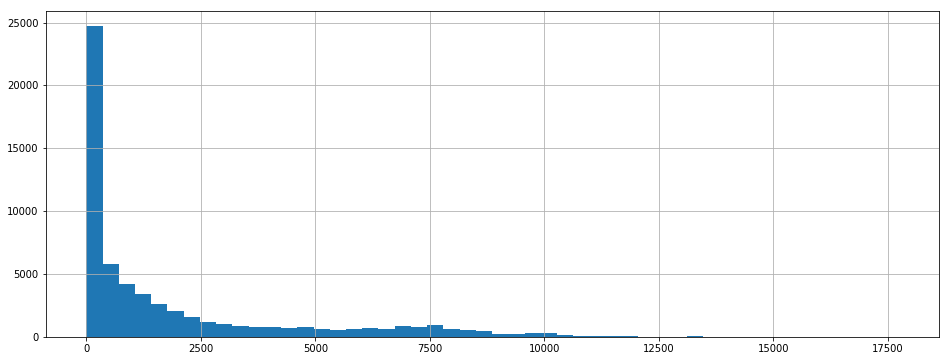

In [31]:
df['fr_wthr_fclt_dstnc'].hist(figsize=[16, 6], bins=50)

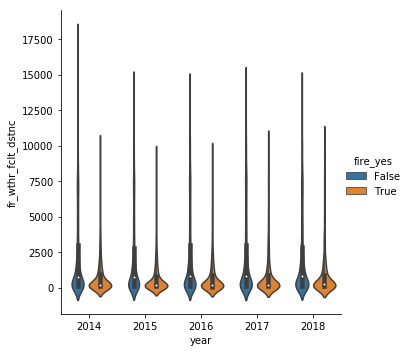

In [32]:
sns.catplot(hue='fire_yes', y='fr_wthr_fclt_dstnc', x='year', data=df, kind='violin')
plt.show()

## ahsm_dstnc 자동심장충격기와의 거리 
상관없을것 같은데, 외진 곳일수록 자동심장충격기도 적어서 결국 외진 곳에서 화재발생 많이 난다는 뜻?

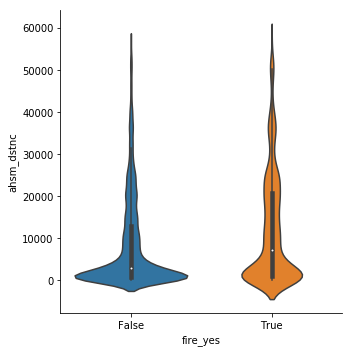

In [33]:
sns.catplot(
    x='fire_yes'
            , y='ahsm_dstnc'
            , data=df
            , kind='violin')
plt.show()

## fr_wthr_fclt_in_100m 반경 100m 내 소방용수시설 수
- 100m 내 소방용수시설이 많을수록 화재발생
- 불이 많이 나는 곳일수록 소방용수시설 많이 설치?
- 대부분 없다

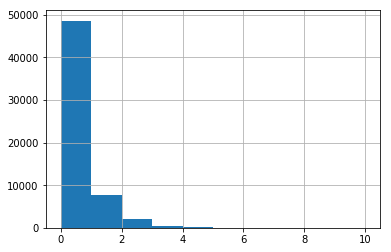

In [34]:
#100m 내 소방용수시설수 전체

df['fr_wthr_fclt_in_100m'].hist()

                         id
fr_wthr_fclt_in_100m       
0                     48609
1                      7668
2                      2168
3                       533
4                       167
5                        36
6                        11
7                         5
8                         1
10                        1


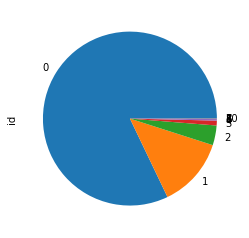

In [35]:
data =df.groupby('fr_wthr_fclt_in_100m')['id'].size()
print(pd.DataFrame(data))
data.plot.pie()

In [36]:
# 100m 내 소방용수시설수 화재발생건 only

data = pd.DataFrame(df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum())
data
# data['fire_yes'].hist(bins=50)

,fire_yes
fr_wthr_fclt_in_100m,
0,5540.0
1,1448.0
2,485.0
3,124.0
4,45.0
5,11.0
6,2.0
7,2.0
8,0.0


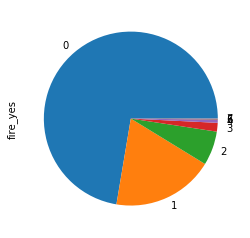

In [37]:
data = df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum()

data.plot.pie()

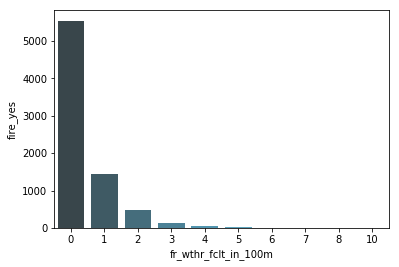

In [38]:
data = pd.DataFrame(df.groupby('fr_wthr_fclt_in_100m')['fire_yes'].sum()).reset_index()

sns.barplot(x='fr_wthr_fclt_in_100m', y='fire_yes', data=data, palette='GnBu_d')

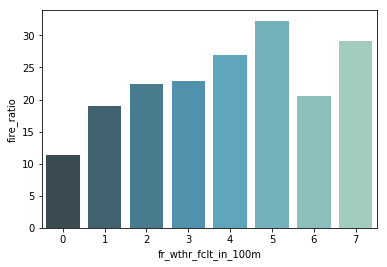

In [39]:
# 소방용수 시설 거리에 따른 화재발생 비율

data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['fr_wthr_fclt_in_100m', 'fire_yes'])['id'].sum()).reset_index()
data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['fr_wthr_fclt_in_100m', 'fire_yes'])['id'].sum()).reset_index()

data = data_True.merge(data_False, how='inner', on='fr_wthr_fclt_in_100m')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

# data
sns.barplot(x='fr_wthr_fclt_in_100m', y='fire_ratio', data=data, palette='GnBu_d')

## bldng_ar 건물 건축면적

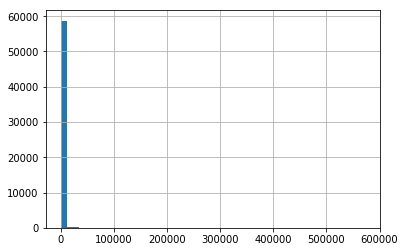

In [40]:
df['bldng_ar'].hist(bins=50)

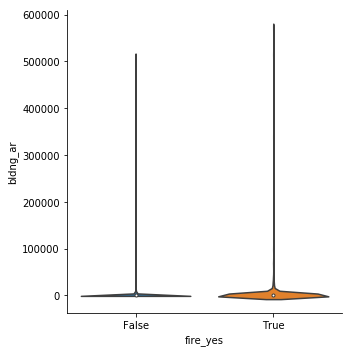

In [41]:
sns.catplot(
    x='fire_yes'
            , y='bldng_ar'
#             , x='year'
            , data=df
            , kind='violin')
plt.show()

## jmk 용도

In [42]:
df['jmk'].unique()

array(['대', '주', '잡', '종', '차', '답', '장', '양', '전', '창', '학', '목', '도',
       '임', '철', '유', '천', '구', '체', '과', '묘', '공', '원', '사', '제', '수'],
      dtype=object)

In [43]:
plt.rcParams['font.family'] = 'NanumGothic'

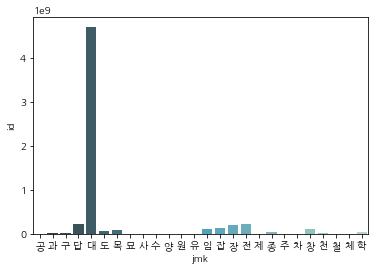

In [44]:
data = pd.DataFrame(df.groupby('jmk')['id'].sum()).reset_index()

sns.barplot(x='jmk', y='id', data=data, palette='GnBu_d')

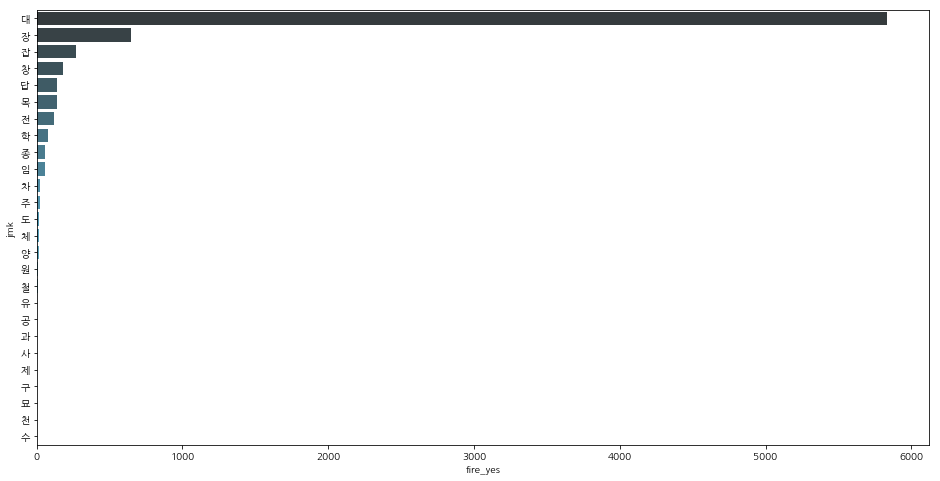

In [45]:
data = pd.DataFrame(df.groupby('jmk')['fire_yes'].sum()).reset_index()
data = data.sort_values(['fire_yes'], ascending=False)

plt.figure(figsize=[16, 8])
sns.barplot(y='jmk', x='fire_yes', data=data, palette='GnBu_d')

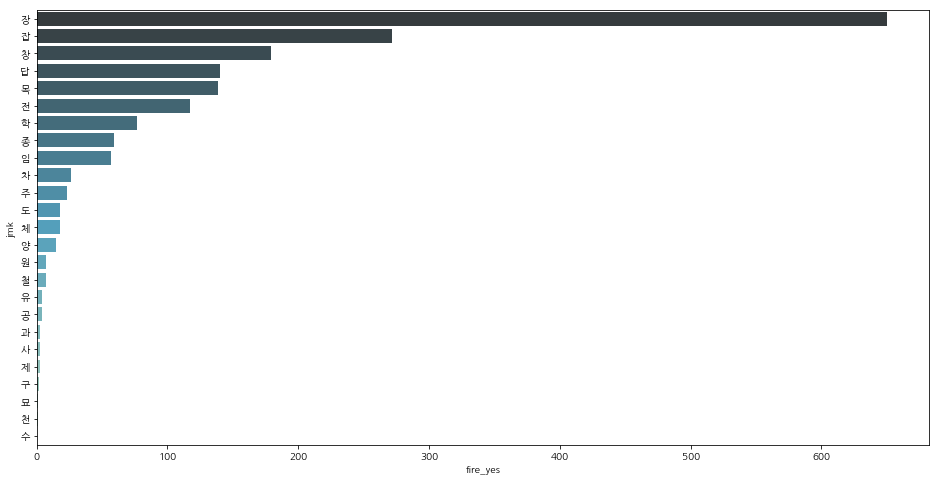

In [46]:
data = pd.DataFrame(df[df['jmk'] != '대'].groupby('jmk')['fire_yes'].sum()).reset_index()

data = data.sort_values(['fire_yes'], ascending=False)
plt.figure(figsize=[16, 8])
sns.barplot(y='jmk', x='fire_yes', data=data, palette='GnBu_d')

### jmk log scale 적용

In [47]:
data['fire_yes(log)'] = np.log(data['fire_yes'])
# 화재발생 0 인 곳이 있어서, log 값을 그래프에 나타내기 위해 0.1로 고쳐줌
data.loc[data['fire_yes'] == 0, 'fire_yes(log)'] = 0.1
data[['fire_yes', 'fire_yes(log)']].sample()

,fire_yes,fire_yes(log)
6,1.0,0.0


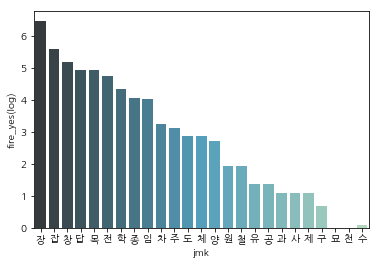

In [48]:
sns.barplot(x='jmk', y='fire_yes(log)', data=data, palette='GnBu_d')

### 각 지목jmk별 화재발생 비율 계산 

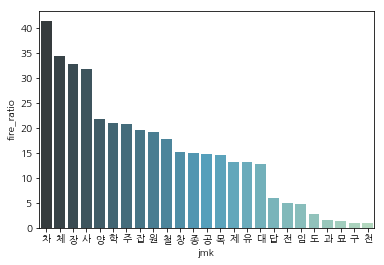

In [49]:
data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['jmk', 'fire_yes'])['id'].sum()).reset_index()
data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['jmk', 'fire_yes'])['id'].sum()).reset_index()

data = data_True.merge(data_False, how='left', on='jmk')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

data = data.sort_values('fire_ratio', ascending=False)
data[['jmk', 'fire_ratio']]

sns.barplot(x='jmk', y='fire_ratio', data=data, palette='GnBu_d')

## fr_sttn_dstnc

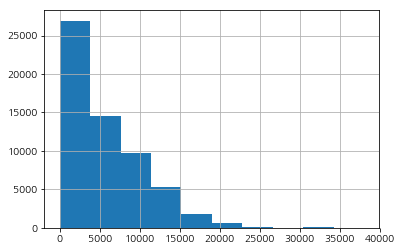

In [50]:
df['fr_sttn_dstnc'].hist()

In [ ]:
# data = pd.DataFrame(df.groupby('fr_sttn_dstnc')['fire_yes'].sum()).reset_index()

# sns.barplot(x='fr_sttn_dstnc', y='fire_yes', data=data, palette='GnBu_d')

In [52]:
# fr_sttn_dstnc 비율
data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['fr_sttn_dstnc', 'fire_yes'])['id'].size()).reset_index()
data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['fr_sttn_dstnc', 'fire_yes'])['id'].size()).reset_index()

data = data_True.merge(data_False, how='inner', on='fr_sttn_dstnc')
data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

data

,fr_sttn_dstnc,fire_yes_x,id_x,fire_yes_y,id_y,fire_ratio
0,42,True,1,False,1,50.000000
1,50,True,1,False,2,33.333333
2,57,True,1,False,1,50.000000
3,58,True,1,False,2,33.333333
4,61,True,2,False,1,66.666667
5,75,True,1,False,1,50.000000
6,77,True,2,False,2,50.000000
7,79,True,1,False,4,20.000000
8,80,True,1,False,3,25.000000
9,83,True,1,False,4,20.000000


In [ ]:
# # relplot 은 이렇게 쓰는거 아닌듯
# sns.relplot(x='fr_sttn_dstnc', y='fire_ratio', data=data)
# plt.show()

### fr_sttn_dstnc 119안전센터와의 거리 log scale

In [53]:
df['fr_sttn_dstnc(log)'] = np.log(df['fr_sttn_dstnc'])

df[['fr_sttn_dstnc', 'fr_sttn_dstnc(log)']].sample()

,fr_sttn_dstnc,fr_sttn_dstnc(log)
50158,12391,9.424726


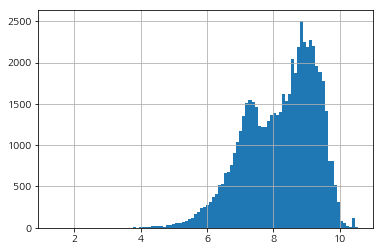

In [54]:
df['fr_sttn_dstnc(log)'].hist(bins=100)

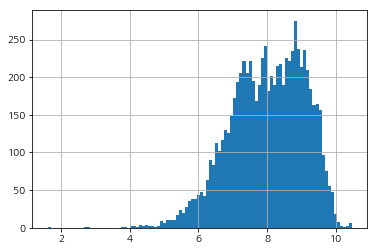

In [55]:
df[df['fire_yes'] == True]['fr_sttn_dstnc(log)'].hist(bins=100)

## tbc_rtl_str_dstnc 담배소매점과의 거리

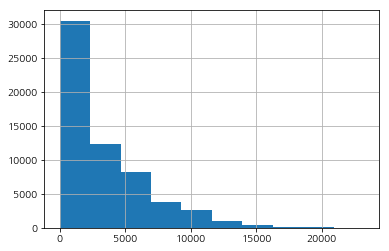

In [56]:
df['tbc_rtl_str_dstnc'].hist()

In [58]:
# 비율 계산

# data_True = pd.DataFrame(df[df['fire_yes'] == True].groupby(['tbc_rtl_str_dstnc', 'fire_yes'])['id'].sum()).reset_index()
# data_False = pd.DataFrame(df[df['fire_yes'] == False].groupby(['tbc_rtl_str_dstnc', 'fire_yes'])['id'].sum()).reset_index()

# data = data_True.merge(data_False, how='inner', on='tbc_rtl_str_dstnc')
# data['fire_ratio'] = data['id_x'].apply(lambda x: int(x)) * 100 / (data['id_x'].apply(lambda x: int(x)) + data['id_y'].apply(lambda x: int(x)))

# # data
# sns.barplot(x='tbc_rtl_str_dstnc', y='fire_ratio', data=data, palette='GnBu_d')

### tbc_rtl_str_dstnc 담배소매점과의 거리 log scale

In [59]:
df['tbc_rtl_str_dstnc(log)'] = np.log(df['tbc_rtl_str_dstnc'])
# 담배 소매점과의 거리가 0 인 곳이 80여곳 있어서, log 값을 그래프에 나타내기 위해 0.1로 고쳐줌
df.loc[df['tbc_rtl_str_dstnc'] == 0, 'tbc_rtl_str_dstnc(log)'] = 0.1
df[['tbc_rtl_str_dstnc', 'tbc_rtl_str_dstnc(log)']].sample()

,tbc_rtl_str_dstnc,tbc_rtl_str_dstnc(log)
7307,697,6.546785


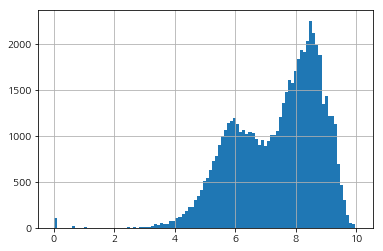

In [60]:
df['tbc_rtl_str_dstnc(log)'].hist(bins=100)

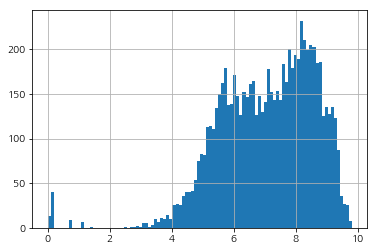

In [61]:
df[df['fire_yes'] == True]['tbc_rtl_str_dstnc(log)'].hist(bins=100)

## bldng_cnt 건물 채수

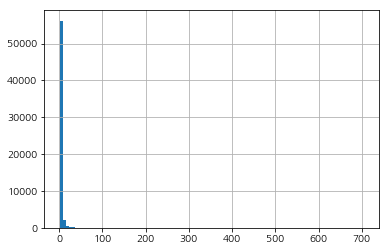

In [62]:
df['bldng_cnt'].hist(bins=100)

In [63]:
df['bldng_cnt(log)'] = np.log(df['bldng_cnt'])

df[['bldng_cnt', 'bldng_cnt(log)']].sample()

,bldng_cnt,bldng_cnt(log)
9564,1,0.0


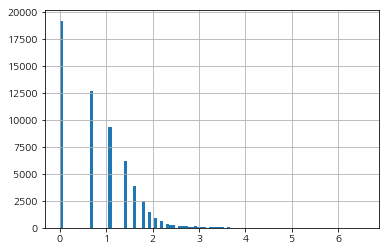

In [64]:
df['bldng_cnt(log)'].hist(bins=100)

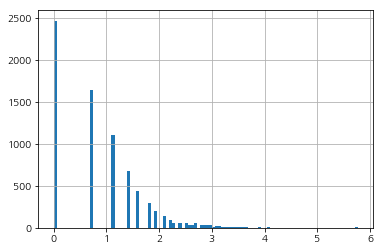

In [65]:
df[df['fire_yes'] == True]['bldng_cnt(log)'].hist(bins=100)

## ttl_ar 건물연면적

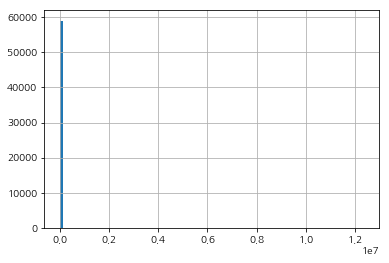

In [66]:
df['ttl_ar'].hist(bins=100)

In [67]:
df['ttl_ar(log)'] = np.log(df['ttl_ar'])
df.loc[df['ttl_ar'] == 0, 'ttl_ar(log)'] = 1 
df[['ttl_ar', 'ttl_ar(log)']].sample()

,ttl_ar,ttl_ar(log)
19776,184.0,5.214936


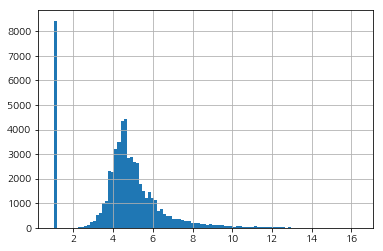

In [68]:
df['ttl_ar(log)'].hist(bins=100)

# Null 값 있는 컬럼

## emd_nm 주소                     4

In [69]:
train[(train['emd_nm'].isnull()) | (train['emd_nm'] == 'nan')]['emd_nm']

9165     NaN
15380    NaN
32671    NaN
36516    NaN
Name: emd_nm, dtype: object

In [70]:
address = train.drop([9165, 15380, 32671, 36516], axis=0)
# df = df.drop([9165, 15380, 32671, 36516], axis=0)

address.sample()

,id,dt_of_fr,bldng_us,bldng_archtctr,bldng_cnt,bldng_ar,ttl_ar,lnd_ar,dt_of_athrztn,ttl_grnd_flr,...,mlt_us_yn,cctv_dstnc,cctv_in_100m,fr_wthr_fclt_in_100m,tbc_rtl_str_dstnc,sft_emrgnc_bll_dstnc,ahsm_dstnc,no_tbc_zn_dstnc,bldng_cnt_in_50m,fr_yn
565,113475,2017-07-07 02:11:10,단독주택,벽돌구조,2,124.56,122.46,513.0,2.00306e+07,1.0,...,N,889,0,0,3231,29191,24435,1247,0,N


In [71]:
address['시도'] = np.nan
address['시군구'] = np.nan
address['구시동면읍'] = np.nan

address['시도'] = address['emd_nm'].apply(lambda x: str(x).split()[0])
address['시군구'] = address['emd_nm'].apply(lambda x: str(x).split()[1][:3])
address['구시동면읍'] = address['emd_nm'].apply(lambda x: str(x).split()[2])
# 창원시는 따로
address.loc[address['시군구'].apply(lambda x: len(x) > 3), '구시동면읍'] = address['emd_nm'].apply(lambda x: str(x).split()[1][3:])

address[['emd_nm', '시도', '시군구', '구시동면읍']].sample()

,emd_nm,시도,시군구,구시동면읍
55134,경상남도 고성군 거류면,경상남도,고성군,거류면


In [72]:
df['시도'] = address['시도']
df['시군구'] = address['시군구']
df['구시동면읍'] = address['구시동면읍']
df['주소'] = address['시도'] + ' ' + address['시군구'] + ' ' + address['구시동면읍']

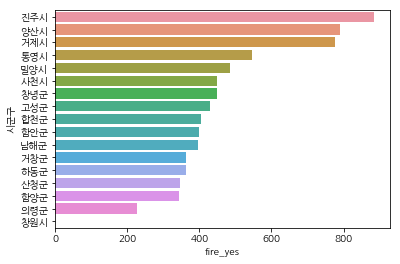

In [73]:
data = pd.DataFrame(df.groupby('시군구')['fire_yes'].sum().reset_index())
data = data.sort_values('fire_yes', ascending=False)

sns.barplot(y='시군구', x='fire_yes',data=data)

## 행정구역 emd_nm 전체

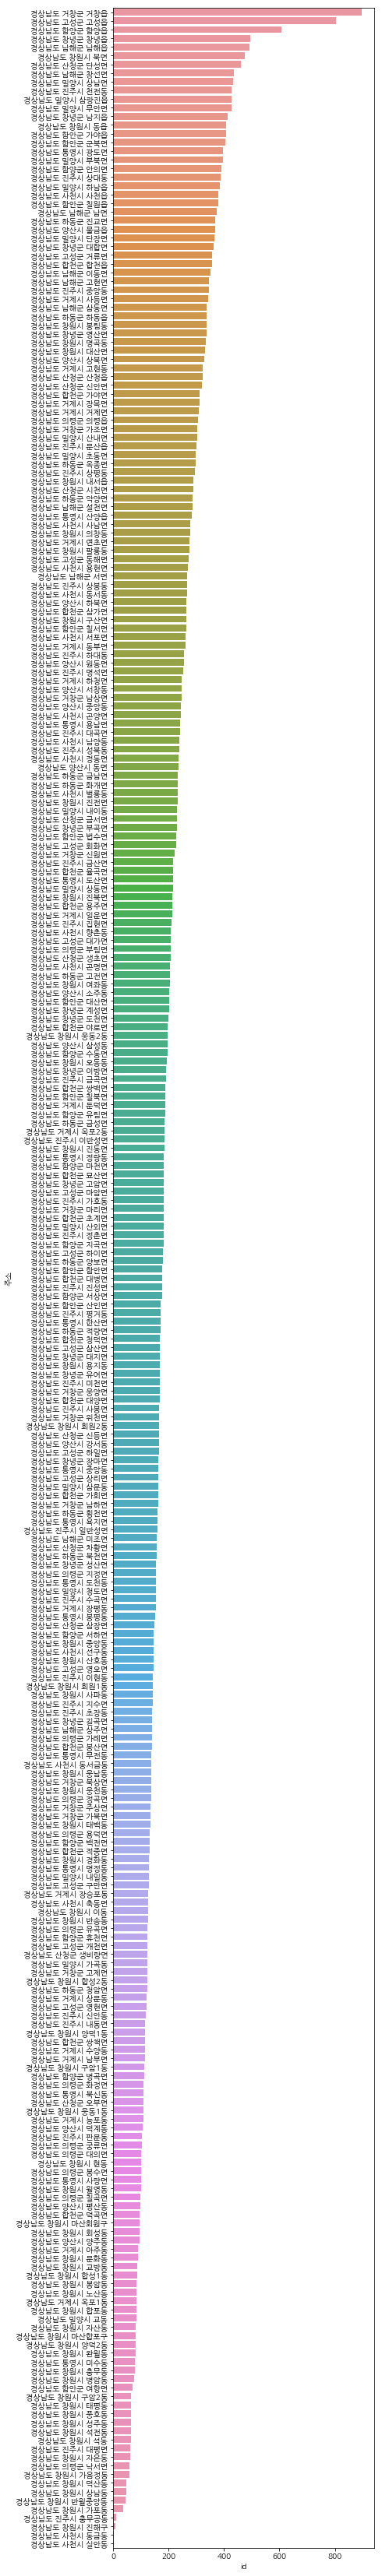

In [74]:
data = pd.DataFrame(df.groupby('주소')['id'].count().reset_index())
data = data.sort_values('id', ascending=False)

plt.figure(figsize=[6, 60])
sns.barplot(y='주소', x='id',data=data)

## 행정구역별 화재발생 수

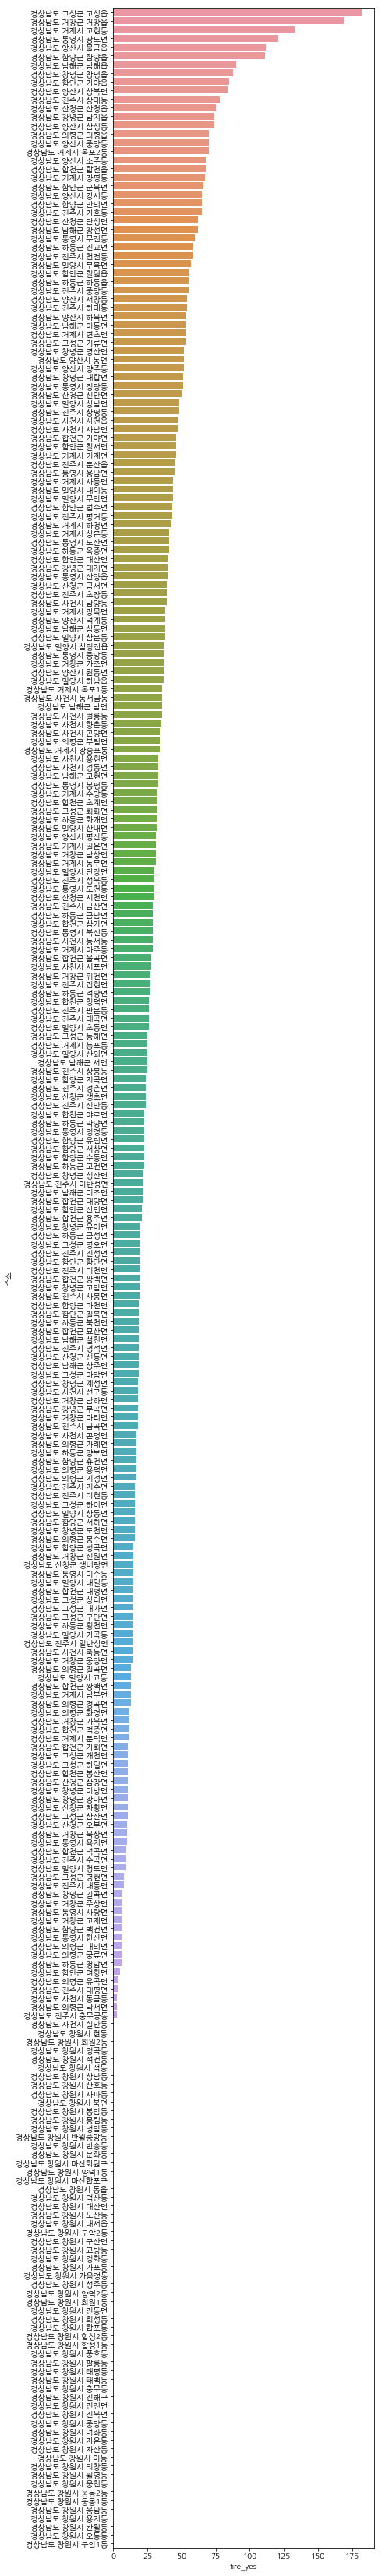

In [75]:
fire_countby_emd_nm = pd.DataFrame(df.groupby('주소')['fire_yes'].sum().reset_index())
fire_countby_emd_nm = fire_countby_emd_nm.sort_values('fire_yes', ascending=False)

plt.figure(figsize=[6, 60])
sns.barplot(y='주소', x='fire_yes',data=fire_countby_emd_nm)

## 행정구역별 화재발생 비율

In [76]:
fire_count = fire_countby_emd_nm.set_index('주소').to_dict()['fire_yes']

In [77]:
fire_count

{'경상남도 고성군 고성읍': 182.0,
 '경상남도 거창군 거창읍': 169.0,
 '경상남도 거제시 고현동': 133.0,
 '경상남도 통영시 광도면': 121.0,
 '경상남도 양산시 물금읍': 112.0,
 '경상남도 함양군 함양읍': 111.0,
 '경상남도 남해군 남해읍': 90.0,
 '경상남도 창녕군 창녕읍': 88.0,
 '경상남도 함안군 가야읍': 85.0,
 '경상남도 양산시 상북면': 84.0,
 '경상남도 진주시 상대동': 78.0,
 '경상남도 산청군 산청읍': 75.0,
 '경상남도 창녕군 남지읍': 74.0,
 '경상남도 양산시 삼성동': 74.0,
 '경상남도 의령군 의령읍': 70.0,
 '경상남도 양산시 중앙동': 70.0,
 '경상남도 거제시 옥포2동': 70.0,
 '경상남도 양산시 소주동': 68.0,
 '경상남도 합천군 합천읍': 68.0,
 '경상남도 거제시 장평동': 67.0,
 '경상남도 함안군 군북면': 66.0,
 '경상남도 양산시 강서동': 65.0,
 '경상남도 함양군 안의면': 65.0,
 '경상남도 진주시 가호동': 65.0,
 '경상남도 산청군 단성면': 62.0,
 '경상남도 남해군 창선면': 62.0,
 '경상남도 통영시 무전동': 60.0,
 '경상남도 하동군 진교면': 58.0,
 '경상남도 진주시 천전동': 58.0,
 '경상남도 밀양시 부북면': 57.0,
 '경상남도 함안군 칠원읍': 55.0,
 '경상남도 하동군 하동읍': 55.0,
 '경상남도 진주시 중앙동': 55.0,
 '경상남도 양산시 서창동': 54.0,
 '경상남도 진주시 하대동': 54.0,
 '경상남도 양산시 하북면': 53.0,
 '경상남도 남해군 이동면': 53.0,
 '경상남도 거제시 연초면': 53.0,
 '경상남도 고성군 거류면': 53.0,
 '경상남도 창녕군 영산면': 52.0,
 '경상남도 양산시 동면': 52.0,
 '경상남도 양산시 양주동': 52.0,
 '경상남도 창녕군 대합면': 51.0,
 '경상남

In [78]:
fire_count['경상남도 통영시 용남면']

45.0

In [82]:
df = df.drop([9165, 15380, 32671, 36516])

In [83]:
for address in df['주소'].unique():

    df.loc[df['주소'] == address, 'fire_countby_emd_nm'] = fire_count[address]

df[['주소', 'fire_countby_emd_nm']].sample()

,주소,fire_countby_emd_nm
54805,경상남도 고성군 마암면,19.0


In [84]:
data = pd.DataFrame(df.groupby('주소')['fire_yes'].sum().reset_index())

data['fire_ratioby_emd_nm'] = data['fire_yes'].apply(lambda x: int(x)) * 100 / df['fire_countby_emd_nm'].apply(lambda x: int(x))

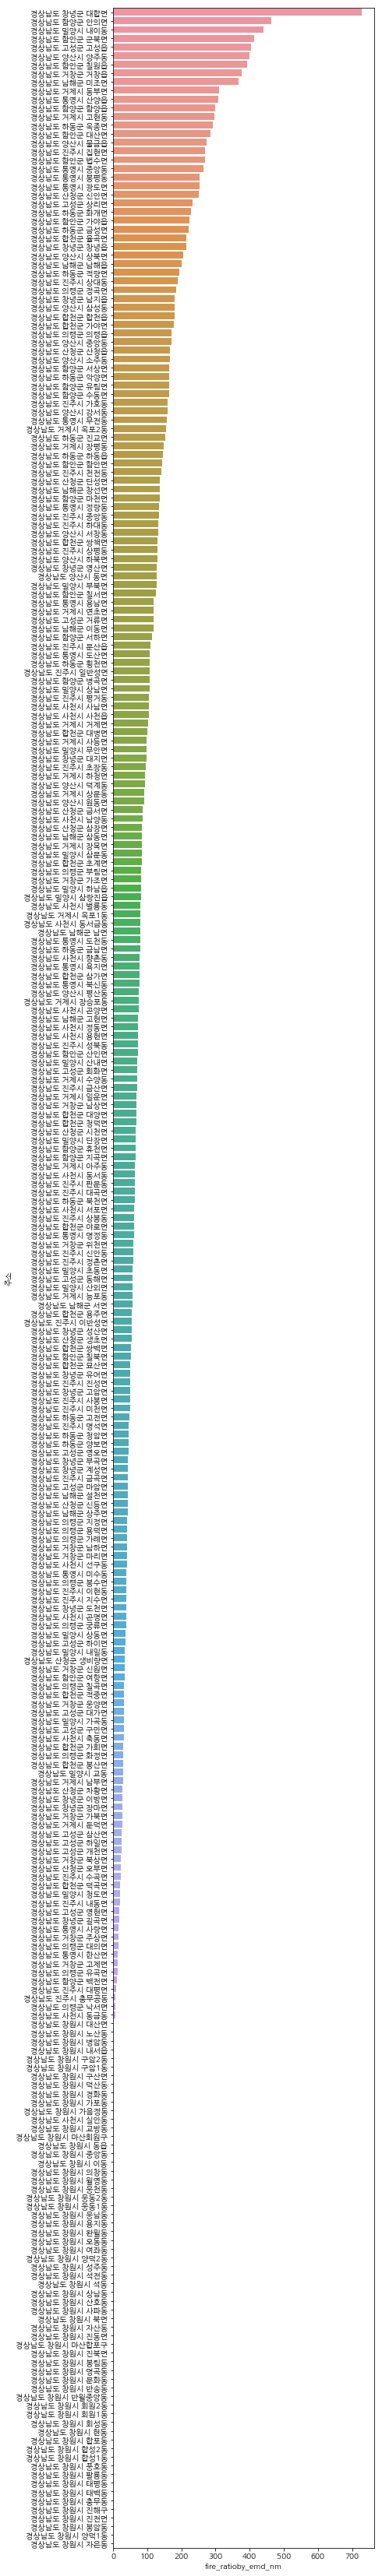

In [85]:
data = data.sort_values('fire_ratioby_emd_nm', ascending=False)

plt.figure(figsize=[6, 60])
sns.barplot(y='주소', x='fire_ratioby_emd_nm',data=data)

## hm_cnt 행정구역 인구            701